# Implementation

In [ ]:
# Install necessary libraries
!pip install ultralytics

  Using cached ultralytics-8.3.106-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.

In [ ]:
# Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Set dataset path (update this with the correct Drive path)
dataset_path = '/content/drive/MyDrive/Main_Dataset/Dataset'  # Modify based on actual path

data_yaml_path = os.path.join(dataset_path, 'data.yaml')
# data_yaml_path = ('/content/drive/MyDrive/Main_dataset/Dataset/data.yaml')


# Import required libraries
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os

file_path = "/content/drive/MyDrive/Main_Dataset/Dataset/data.yaml"

if os.path.exists(file_path):
    print("✅ data.yaml file is found!")
else:
    print("❌ data.yaml file is missing!")


✅ data.yaml file is found!


In [ ]:
# Initialize and train the YOLOv11 model
model = YOLO("yolo11n.pt")  # Load YOLOv11 model

100%|██████████| 5.35M/5.35M [00:00<00:00, 65.2MB/s]


In [ ]:
# Train on the dataset from Drive
model.train(data=data_yaml_path, epochs=100, imgsz=640)

Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Main_Dataset/Dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Main_Dataset/Dataset/train/labels.cache... 129 images, 1 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Main_Dataset/Dataset/valid/labels.cache... 17 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.033      3.178       1.51          2        640: 100%|██████████| 9/9 [02:11<00:00, 14.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.74s/it]

                   all         17         19    0.00391          1      0.507      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G     0.9225       2.96      1.421          1        640: 100%|██████████| 9/9 [02:07<00:00, 14.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.22s/it]

                   all         17         19     0.0038          1      0.643      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G     0.9801      2.578       1.42          2        640: 100%|██████████| 9/9 [01:57<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.33s/it]

                   all         17         19    0.00376          1      0.593      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.023      2.331        1.5          2        640: 100%|██████████| 9/9 [01:55<00:00, 12.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.97s/it]

                   all         17         19     0.0039          1      0.528      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.002      2.024      1.436          2        640: 100%|██████████| 9/9 [01:50<00:00, 12.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.73s/it]

                   all         17         19    0.00521      0.944      0.315      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.137      2.003      1.487          2        640: 100%|██████████| 9/9 [01:59<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.16s/it]

                   all         17         19      0.783       0.24      0.474      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.257      2.203      1.617          2        640: 100%|██████████| 9/9 [01:52<00:00, 12.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.56s/it]

                   all         17         19      0.105      0.111      0.188     0.0785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.253       1.99      1.603          4        640: 100%|██████████| 9/9 [01:58<00:00, 13.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.16s/it]

                   all         17         19      0.728      0.278      0.422      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.105      2.052      1.467          1        640: 100%|██████████| 9/9 [01:50<00:00, 12.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.39s/it]

                   all         17         19      0.275      0.167      0.274      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.071      1.677      1.394          4        640: 100%|██████████| 9/9 [01:53<00:00, 12.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.25s/it]

                   all         17         19      0.717      0.548      0.632      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.163      1.739       1.46          6        640: 100%|██████████| 9/9 [01:56<00:00, 12.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.37s/it]

                   all         17         19          1      0.107      0.163     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.154      1.968      1.536          1        640: 100%|██████████| 9/9 [01:55<00:00, 12.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.99s/it]

                   all         17         19      0.105     0.0556     0.0668     0.0232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.082       1.57      1.445          4        640: 100%|██████████| 9/9 [01:55<00:00, 12.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.04s/it]

                   all         17         19       0.39      0.261      0.154     0.0739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.061       1.57      1.443          4        640: 100%|██████████| 9/9 [02:03<00:00, 13.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.21s/it]

                   all         17         19      0.483      0.267      0.268      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.124      1.831      1.493          1        640: 100%|██████████| 9/9 [01:56<00:00, 12.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]

                   all         17         19      0.506      0.322      0.451      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.061      1.508      1.406          4        640: 100%|██████████| 9/9 [02:04<00:00, 13.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.65s/it]

                   all         17         19      0.653      0.222      0.248     0.0914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G       1.13      1.682      1.483          2        640: 100%|██████████| 9/9 [01:53<00:00, 12.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.29s/it]

                   all         17         19      0.452       0.65      0.602      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.089      1.426       1.41          6        640: 100%|██████████| 9/9 [01:56<00:00, 12.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.93s/it]

                   all         17         19      0.361      0.383       0.44      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.089      1.383      1.422          2        640: 100%|██████████| 9/9 [01:59<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.77s/it]

                   all         17         19      0.978      0.333      0.484      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G        1.1      1.348      1.474          2        640: 100%|██████████| 9/9 [01:51<00:00, 12.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.96s/it]

                   all         17         19      0.385      0.737      0.622      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.073      1.522      1.426          2        640: 100%|██████████| 9/9 [01:53<00:00, 12.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.72s/it]

                   all         17         19      0.439       0.75      0.577      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      1.014      1.478       1.36          3        640: 100%|██████████| 9/9 [01:52<00:00, 12.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.01s/it]

                   all         17         19      0.403      0.316      0.258      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G       1.39      2.044      1.692          1        640: 100%|██████████| 9/9 [01:52<00:00, 12.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.68s/it]

                   all         17         19      0.604      0.594      0.557      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.014      1.524      1.347          8        640: 100%|██████████| 9/9 [01:53<00:00, 12.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.80s/it]

                   all         17         19      0.586      0.764      0.829      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G     0.9329      1.273      1.355          1        640: 100%|██████████| 9/9 [01:55<00:00, 12.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.23s/it]

                   all         17         19      0.677      0.865      0.853      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G     0.8795      1.159      1.256          3        640: 100%|██████████| 9/9 [01:53<00:00, 12.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.69s/it]

                   all         17         19      0.737      0.882      0.842      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      1.098      1.168       1.36          3        640: 100%|██████████| 9/9 [01:52<00:00, 12.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.01s/it]

                   all         17         19      0.824      0.889      0.953      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      1.018      1.843      1.335          1        640: 100%|██████████| 9/9 [01:54<00:00, 12.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.75s/it]

                   all         17         19      0.805       0.75      0.828      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G     0.9495      1.242      1.349          2        640: 100%|██████████| 9/9 [01:54<00:00, 12.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.00s/it]

                   all         17         19       0.76      0.644      0.697       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      1.166      1.235      1.501          1        640: 100%|██████████| 9/9 [01:51<00:00, 12.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.77s/it]

                   all         17         19      0.419        0.7      0.499      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G       1.18      1.244      1.606          1        640: 100%|██████████| 9/9 [01:53<00:00, 12.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.68s/it]

                   all         17         19      0.498      0.539      0.545      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G     0.9165      1.201      1.266          1        640: 100%|██████████| 9/9 [01:54<00:00, 12.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.22s/it]

                   all         17         19      0.702      0.858      0.812      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.042      1.189      1.367          5        640: 100%|██████████| 9/9 [01:52<00:00, 12.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]

                   all         17         19      0.912        0.9      0.962      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G     0.9632      1.255       1.35          4        640: 100%|██████████| 9/9 [01:50<00:00, 12.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.93s/it]

                   all         17         19       0.91      0.994      0.981       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      1.057      1.157      1.353          3        640: 100%|██████████| 9/9 [01:52<00:00, 12.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.66s/it]

                   all         17         19      0.843      0.936      0.953      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G     0.9428      1.279      1.306          2        640: 100%|██████████| 9/9 [01:54<00:00, 12.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.84s/it]

                   all         17         19      0.836      0.794      0.894      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      1.035      1.447      1.458          1        640: 100%|██████████| 9/9 [01:55<00:00, 12.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]

                   all         17         19      0.845      0.839      0.912      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      1.032      1.342      1.383          2        640: 100%|██████████| 9/9 [01:53<00:00, 12.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]

                   all         17         19      0.872        0.9      0.929      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.8883       1.05      1.266          3        640: 100%|██████████| 9/9 [01:52<00:00, 12.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.69s/it]

                   all         17         19       0.76      0.894      0.824      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.9385      1.117      1.288          3        640: 100%|██████████| 9/9 [01:51<00:00, 12.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.01s/it]

                   all         17         19      0.852      0.821      0.877       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.9135     0.9101      1.283          4        640: 100%|██████████| 9/9 [01:48<00:00, 12.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.41s/it]

                   all         17         19       0.87      0.839      0.879       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.8612      0.917      1.241          4        640: 100%|██████████| 9/9 [01:51<00:00, 12.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.72s/it]

                   all         17         19      0.922      0.807      0.932      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.9109     0.9115      1.249          4        640: 100%|██████████| 9/9 [01:53<00:00, 12.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.69s/it]

                   all         17         19       0.87          1      0.926      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.8944     0.9524      1.269          4        640: 100%|██████████| 9/9 [01:51<00:00, 12.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.00s/it]

                   all         17         19      0.881       0.95      0.956      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.8314     0.9619      1.257          4        640: 100%|██████████| 9/9 [01:49<00:00, 12.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.45s/it]

                   all         17         19      0.896      0.943      0.937      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      0.932      1.094      1.269          2        640: 100%|██████████| 9/9 [01:49<00:00, 12.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.02s/it]

                   all         17         19      0.995      0.988      0.995      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G     0.8374     0.8905      1.259          2        640: 100%|██████████| 9/9 [01:52<00:00, 12.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.73s/it]

                   all         17         19      0.941      0.917      0.915        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.7998      0.894      1.229          2        640: 100%|██████████| 9/9 [01:52<00:00, 12.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.07s/it]

                   all         17         19      0.931          1      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.9141      1.079      1.304          3        640: 100%|██████████| 9/9 [01:50<00:00, 12.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.30s/it]

                   all         17         19      0.889          1       0.99      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.8539     0.9691      1.262          5        640: 100%|██████████| 9/9 [01:54<00:00, 12.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.78s/it]

                   all         17         19      0.981      0.939      0.941      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G     0.7374     0.8805      1.182          1        640: 100%|██████████| 9/9 [01:52<00:00, 12.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]

                   all         17         19       0.93      0.925      0.945      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G     0.7844     0.8188      1.219          3        640: 100%|██████████| 9/9 [01:49<00:00, 12.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.41s/it]

                   all         17         19      0.938       0.95      0.962      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.9276     0.8832      1.274          4        640: 100%|██████████| 9/9 [01:51<00:00, 12.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.06s/it]

                   all         17         19      0.938       0.95      0.976      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.8851     0.8958      1.285          5        640: 100%|██████████| 9/9 [02:04<00:00, 13.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.18s/it]

                   all         17         19      0.944          1      0.981      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G     0.8473     0.8477      1.266          4        640: 100%|██████████| 9/9 [01:55<00:00, 12.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.03s/it]

                   all         17         19      0.909      0.984      0.963      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.8505     0.9181      1.245          6        640: 100%|██████████| 9/9 [01:55<00:00, 12.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.05s/it]

                   all         17         19      0.977          1      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G     0.7922      0.803      1.231          3        640: 100%|██████████| 9/9 [02:04<00:00, 13.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]

                   all         17         19       0.94          1      0.984      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.9325      1.213      1.363          1        640: 100%|██████████| 9/9 [02:08<00:00, 14.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.70s/it]

                   all         17         19      0.968          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.9772      1.239      1.368          2        640: 100%|██████████| 9/9 [02:06<00:00, 14.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]

                   all         17         19      0.936          1       0.99      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.8384      1.198      1.275          1        640: 100%|██████████| 9/9 [02:07<00:00, 14.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.17s/it]

                   all         17         19      0.936      0.981      0.977      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.8459     0.8067      1.236          4        640: 100%|██████████| 9/9 [02:03<00:00, 13.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]

                   all         17         19       0.97      0.879      0.986      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.9204     0.8765      1.261          2        640: 100%|██████████| 9/9 [02:09<00:00, 14.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.50s/it]

                   all         17         19       0.96      0.904       0.99      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.7037     0.7686      1.164          2        640: 100%|██████████| 9/9 [02:03<00:00, 13.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.04s/it]

                   all         17         19      0.929       0.99      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.7402     0.7603      1.186          1        640: 100%|██████████| 9/9 [02:04<00:00, 13.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.98s/it]

                   all         17         19      0.937       0.95      0.987      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.8969      1.175      1.302          1        640: 100%|██████████| 9/9 [02:03<00:00, 13.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.58s/it]

                   all         17         19      0.939       0.95      0.987      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.7768     0.7001      1.191          4        640: 100%|██████████| 9/9 [02:00<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]

                   all         17         19      0.928       0.95      0.987       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.8591      1.173      1.257          1        640: 100%|██████████| 9/9 [02:09<00:00, 14.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.67s/it]

                   all         17         19      0.982          1      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.7529      0.783      1.202          3        640: 100%|██████████| 9/9 [02:02<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.66s/it]

                   all         17         19      0.993      0.999      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.7212     0.6484      1.128          3        640: 100%|██████████| 9/9 [02:02<00:00, 13.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.63s/it]

                   all         17         19      0.987       0.95      0.983      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.8122     0.7471      1.178          4        640: 100%|██████████| 9/9 [02:00<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.61s/it]

                   all         17         19      0.898      0.946      0.976      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G       0.79      0.792       1.19          2        640: 100%|██████████| 9/9 [02:00<00:00, 13.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.70s/it]

                   all         17         19      0.899      0.946      0.983      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G     0.8662      1.071      1.358          1        640: 100%|██████████| 9/9 [01:56<00:00, 12.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.92s/it]

                   all         17         19      0.954      0.994      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.8572     0.7608      1.218          2        640: 100%|██████████| 9/9 [02:04<00:00, 13.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.78s/it]

                   all         17         19      0.974      0.996      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.7775     0.7267      1.205          5        640: 100%|██████████| 9/9 [02:03<00:00, 13.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.66s/it]

                   all         17         19      0.987          1      0.995      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.7921     0.7199      1.174          3        640: 100%|██████████| 9/9 [02:03<00:00, 13.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.84s/it]

                   all         17         19      0.988          1      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.7686     0.9808       1.19          1        640: 100%|██████████| 9/9 [02:04<00:00, 13.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]

                   all         17         19      0.982          1      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.7689     0.8413      1.152          4        640: 100%|██████████| 9/9 [02:02<00:00, 13.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.97s/it]

                   all         17         19      0.975          1      0.995      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.7046     0.7366      1.122          4        640: 100%|██████████| 9/9 [02:05<00:00, 13.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.07s/it]

                   all         17         19      0.972          1      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.6698     0.6597      1.143          4        640: 100%|██████████| 9/9 [02:05<00:00, 13.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.74s/it]

                   all         17         19      0.968          1      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G      0.721     0.6482      1.141          3        640: 100%|██████████| 9/9 [02:05<00:00, 13.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.82s/it]

                   all         17         19      0.974          1      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.7109     0.7579      1.152          7        640: 100%|██████████| 9/9 [02:03<00:00, 13.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.76s/it]

                   all         17         19      0.939      0.986      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G      0.728     0.7105      1.173          2        640: 100%|██████████| 9/9 [02:02<00:00, 13.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.96s/it]

                   all         17         19      0.966      0.982      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.7272     0.6636      1.167          3        640: 100%|██████████| 9/9 [02:04<00:00, 13.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.88s/it]

                   all         17         19      0.948          1      0.995       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.7425     0.9719      1.213          1        640: 100%|██████████| 9/9 [02:03<00:00, 13.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.63s/it]

                   all         17         19      0.974          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.6432     0.6111      1.141          2        640: 100%|██████████| 9/9 [02:02<00:00, 13.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.67s/it]

                   all         17         19      0.975          1      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.7212      0.712      1.154          5        640: 100%|██████████| 9/9 [02:03<00:00, 13.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.67s/it]

                   all         17         19      0.954       0.98      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.6756     0.6063      1.138          4        640: 100%|██████████| 9/9 [02:02<00:00, 13.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.70s/it]

                   all         17         19      0.945       0.95      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.7246       1.37      1.165          1        640: 100%|██████████| 9/9 [02:05<00:00, 13.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.87s/it]

                   all         17         19      0.965      0.997      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.6246      0.609      1.105          4        640: 100%|██████████| 9/9 [02:01<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.82s/it]

                   all         17         19      0.976      0.999      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.6904     0.6169       1.13          4        640: 100%|██████████| 9/9 [02:01<00:00, 13.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.73s/it]

                   all         17         19      0.977          1      0.995      0.827


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.6174     0.7304      1.151          1        640: 100%|██████████| 9/9 [02:04<00:00, 13.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.62s/it]

                   all         17         19       0.98          1      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.5799     0.7664      1.115          1        640: 100%|██████████| 9/9 [02:03<00:00, 13.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.61s/it]

                   all         17         19      0.979          1      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.8101     0.7384       1.35          1        640: 100%|██████████| 9/9 [02:02<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.61s/it]

                   all         17         19      0.977          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.5528       1.26      1.008          0        640: 100%|██████████| 9/9 [01:57<00:00, 13.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.67s/it]

                   all         17         19      0.975      0.999      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.6308      1.126      1.176          1        640: 100%|██████████| 9/9 [02:01<00:00, 13.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.78s/it]

                   all         17         19      0.974      0.999      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.8421      1.035      1.409          1        640: 100%|██████████| 9/9 [02:03<00:00, 13.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]

                   all         17         19      0.974          1      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.6446     0.6581      1.147          1        640: 100%|██████████| 9/9 [02:05<00:00, 13.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.36s/it]

                   all         17         19      0.975          1      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.5661     0.9068      1.109          1        640: 100%|██████████| 9/9 [02:01<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.28s/it]

                   all         17         19      0.976          1      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.7722     0.5985      1.317          1        640: 100%|██████████| 9/9 [02:04<00:00, 13.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  6.00s/it]

                   all         17         19      0.976          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.5962     0.5469      1.121          1        640: 100%|██████████| 9/9 [02:10<00:00, 14.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.70s/it]

                   all         17         19      0.976          1      0.995      0.843



100 epochs completed in 3.457 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.36s/it]


                   all         17         19      0.974          1      0.995      0.865
                Damage          9         10      0.993          1      0.995       0.77
             No Damage          9          9      0.954          1      0.995      0.959
Speed: 2.7ms preprocess, 293.5ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d031968bad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
# Validate model
metrics = model.val(data=data_yaml_path, split='test')
print("mAP@0.5:", metrics.box.map50)
print("mAP@0.5:0.95:", metrics.box.map)
print("Precision:", metrics.box.mp)
print("Recall:", metrics.box.mr)

Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/drive/MyDrive/Main_Dataset/Dataset/test/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.19s/it]


                   all         16         16      0.975          1      0.995      0.758
                Damage         10         10      0.989          1      0.995       0.66
             No Damage          6          6       0.96          1      0.995      0.856
Speed: 1.9ms preprocess, 243.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train3
mAP@0.5: 0.995
mAP@0.5:0.95: 0.7575228448769693
Precision: 0.9745851888407437
Recall: 1.0


In [ ]:

# Save trained model
model.save("/content/drive/MyDrive/U_Dataset_11.pt")

In [ ]:
# Evaluate per-class metrics
evaluated_classes = metrics.box.ap_class_index
for i, class_name in model.names.items():
    if i in evaluated_classes:
        idx = np.where(evaluated_classes == i)[0][0]
        precision = metrics.box.p[idx]
        recall = metrics.box.r[idx]
        ap50 = metrics.box.ap50[idx]
        ap = metrics.box.ap[idx]
        print(f"Class: {class_name}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  mAP@0.5: {ap50:.4f}")
        print(f"  mAP@0.5:0.95: {ap:.4f}")
    else:
        print(f"Class: {class_name}")
        print("  No predictions or annotations in test set.")
    print("-" * 30)

Class: Damage
  Precision: 0.9889
  Recall: 1.0000
  mAP@0.5: 0.9950
  mAP@0.5:0.95: 0.6595
------------------------------
Class: No Damage
  Precision: 0.9603
  Recall: 1.0000
  mAP@0.5: 0.9950
  mAP@0.5:0.95: 0.8555
------------------------------



image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_6.jpg: 640x640 1 Damage, 219.9ms
Speed: 4.1ms preprocess, 219.9ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 640)


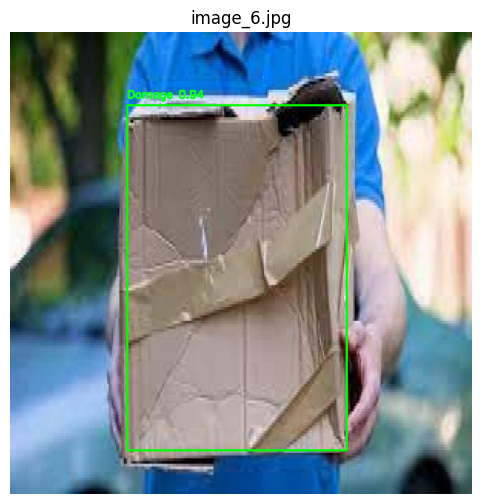


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_40.jpg: 640x640 1 Damage, 273.9ms
Speed: 4.9ms preprocess, 273.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


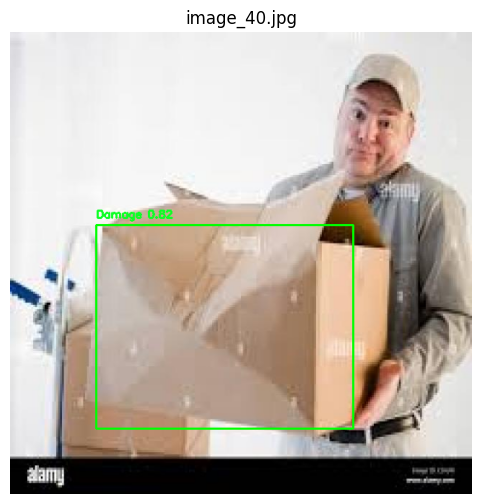


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_41.jpg: 640x640 1 Damage, 248.7ms
Speed: 5.3ms preprocess, 248.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


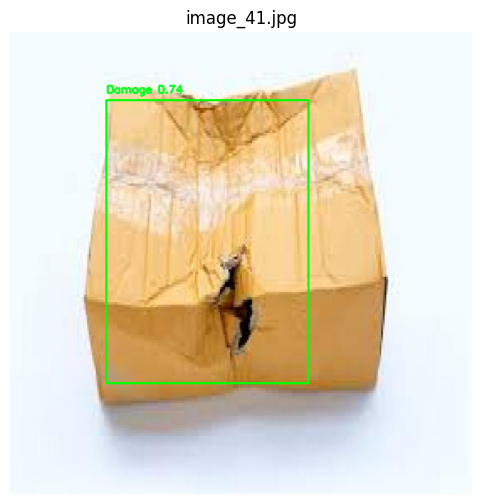


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_50.jpg: 640x640 1 Damage, 237.5ms
Speed: 6.4ms preprocess, 237.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


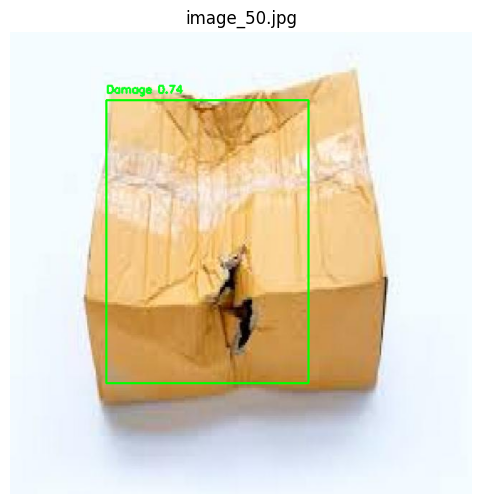


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_52.jpg: 640x640 1 Damage, 317.0ms
Speed: 4.9ms preprocess, 317.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


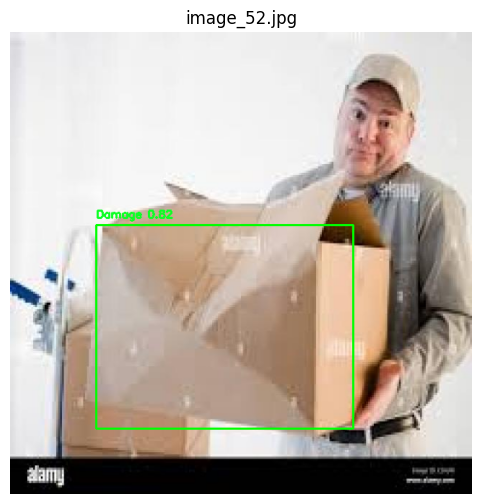


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_57.jpg: 640x640 1 Damage, 347.6ms
Speed: 7.0ms preprocess, 347.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


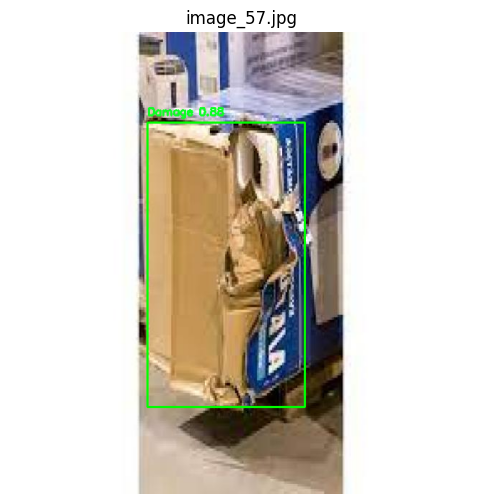


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_61.jpg: 640x640 1 Damage, 351.9ms
Speed: 3.9ms preprocess, 351.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


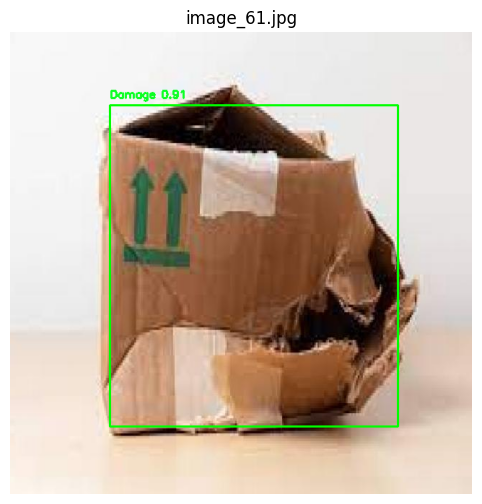


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_73.jpg: 640x640 1 Damage, 341.6ms
Speed: 6.4ms preprocess, 341.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


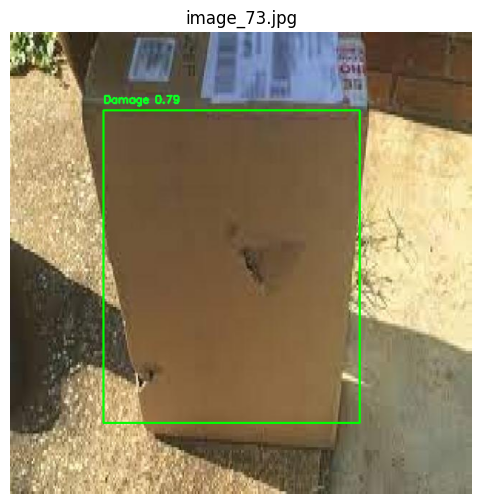


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_76.jpg: 640x640 2 Damages, 342.2ms
Speed: 4.3ms preprocess, 342.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


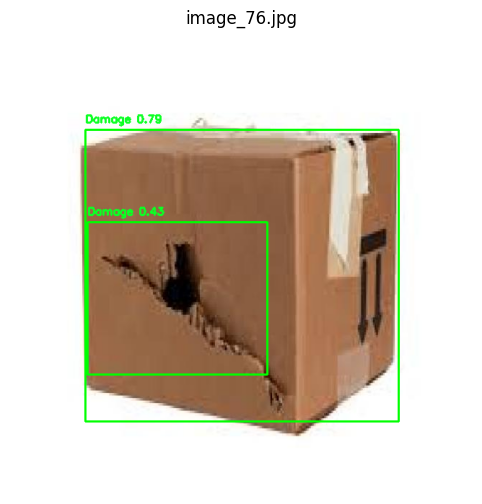


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_94.jpg: 640x640 1 Damage, 403.2ms
Speed: 4.2ms preprocess, 403.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


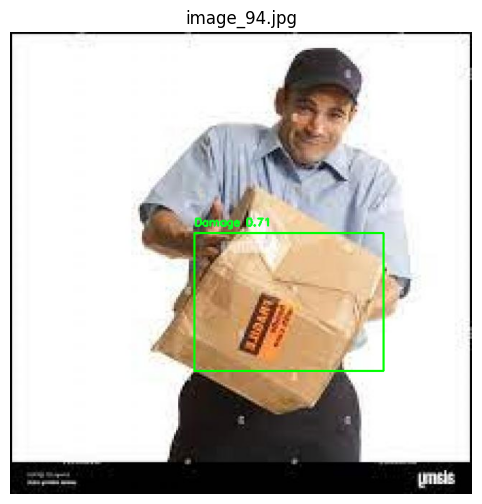


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_114.jpg: 448x640 1 No Damage, 278.7ms
Speed: 7.8ms preprocess, 278.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


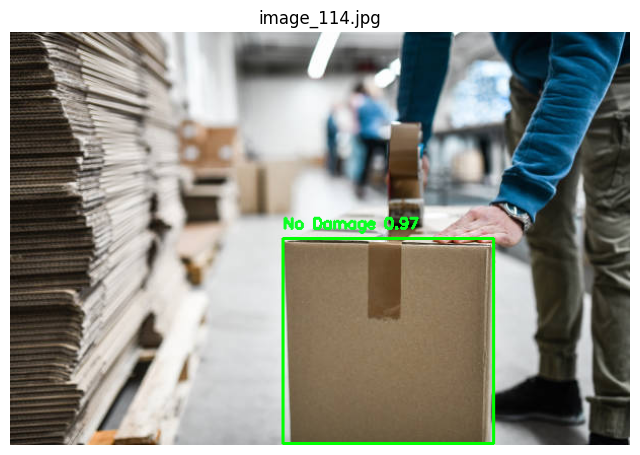


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_115.jpg: 448x640 1 No Damage, 317.3ms
Speed: 7.1ms preprocess, 317.3ms inference, 3.6ms postprocess per image at shape (1, 3, 448, 640)


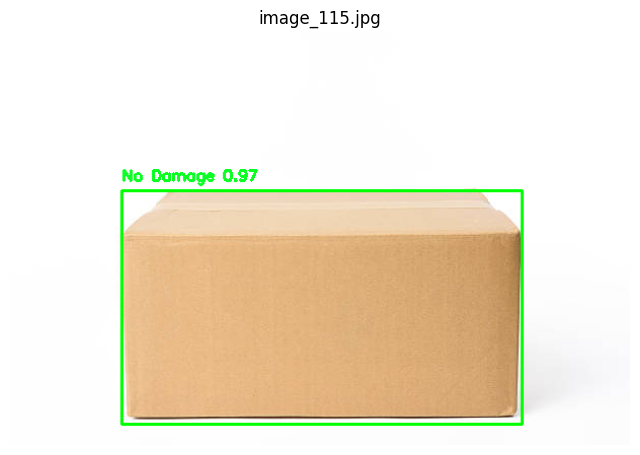


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_134.jpg: 640x640 2 No Damages, 250.9ms
Speed: 9.6ms preprocess, 250.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


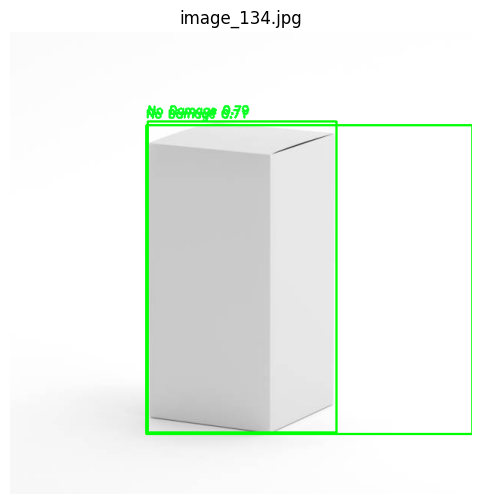


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_136.jpg: 448x640 1 No Damage, 212.8ms
Speed: 4.7ms preprocess, 212.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


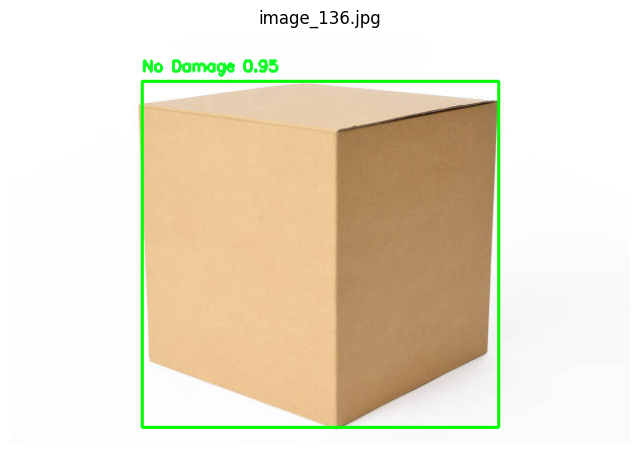


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_158.jpg: 448x640 1 No Damage, 188.5ms
Speed: 4.8ms preprocess, 188.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


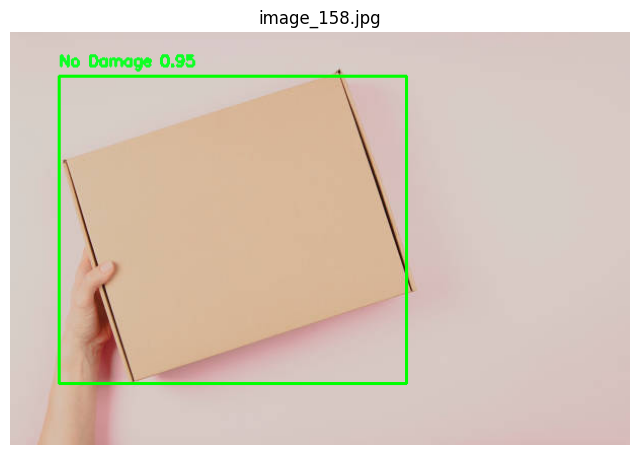


image 1/1 /content/drive/MyDrive/Main_Dataset/Dataset/test/images/image_162.jpg: 448x640 1 No Damage, 196.3ms
Speed: 3.8ms preprocess, 196.3ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


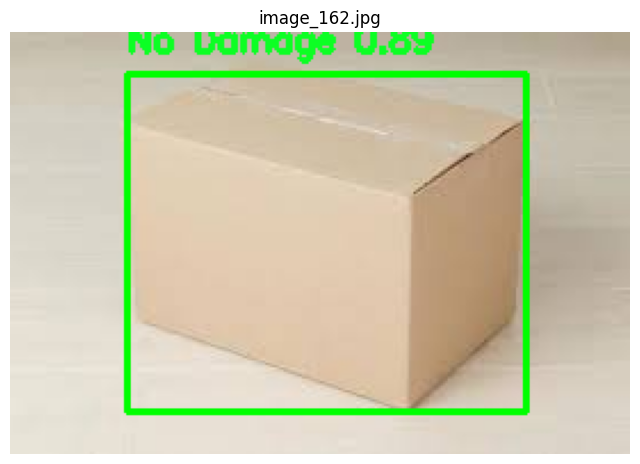

In [ ]:
# Set paths for test images and output folder
test_img_dir = os.path.join(dataset_path, 'test', 'images')
output_dir = '/content/drive/MyDrive/Main_Dataset/detected_images'
os.makedirs(output_dir, exist_ok=True)

# Run object detection on test images
image_files = [f for f in os.listdir(test_img_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
for file in image_files:
    image_path = os.path.join(test_img_dir, file)
    results = model(image_path)[0]
    img = cv2.imread(image_path)
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0].item()
        cls = int(box.cls[0])
        label = f"{model.names[cls]} {conf:.2f}"
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2)
    result_path = os.path.join(output_dir, file)
    cv2.imwrite(result_path, img)
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(file)
    plt.axis('off')
    plt.show()
